In [1]:
import pandas as pd
df = pd.read_csv('clickbait_dataset.csv')
df.head()


,headline,clickbait
0,This Is What $1 USD Gets You In Food All Aroun...,1
1,Make These Easy Chicken Fajita Quesadillas At ...,1
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",1
3,34 Online Shops Based In The Southeast You Sho...,1
4,US and France to work together for new Iran sa...,0


In [2]:
df = df.dropna()


In [3]:
import ssl
import nltk

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')  # Asegúrate de que 'punkt' es el paquete correcto


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import numpy as np
embeddings ={}
with open('/Users/jorgejimenez/Documents/UP/NLP/simcos/glove.42B.300d.txt', encoding='utf-8') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:])
    embeddings[word] = vectors

In [5]:
import contractions               #Won't -> will not
import re                         #Regex
import nltk                       #Tokenizar texto
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

stopwords_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
tqdm.pandas()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
def vectorize(texto):
  vector_size = 300 #Dependiento del archivo de glove -> glove.6B.300d.txt

  #Todo a minusculas
  texto = texto.lower()

  #Contracciones
  texto = contractions.fix(texto)

  #Regex para quitar todo lo que no sea letra
  texto = re.sub(r'[^a-z\s]','', texto)

  #Quitar stop words
  texto = word_tokenize(texto)

  #Eliminar stopwords
  texto = [token for token in texto if token not in stopwords_en]

  #Lemmatizar
  texto = [lemmatizer.lemmatize(word) for word in texto]

  #Generar vector (sumar linealmente)
  vector = np.zeros(vector_size)

  for word in texto:
    if word in embeddings:
      vector += embeddings[word].astype(float)

  vector = vector.reshape(1, -1)[0] #Una fila, columans necesarias

  return vector

In [7]:
from tqdm import tqdm
nltk.download('punk_tab')
tqdm.pandas()
df['vector'] = df['headline'].progress_apply(vectorize)


[nltk_data] Error loading punk_tab: Package 'punk_tab' not found in
[nltk_data]     index
100%|██████████| 32000/32000 [00:19<00:00, 1628.58it/s]


In [8]:
df.head()

,headline,clickbait,vector
0,This Is What $1 USD Gets You In Food All Aroun...,1,"[0.3411369999999999, 0.016487000000000016, 0.2..."
1,Make These Easy Chicken Fajita Quesadillas At ...,1,"[-0.40621599999999997, -1.1668068399999998, 1...."
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",1,"[-2.3220799999999997, 2.40599, 1.121831, -0.07..."
3,34 Online Shops Based In The Southeast You Sho...,1,"[1.675697, 0.37274699999999994, 0.892619, -1.4..."
4,US and France to work together for new Iran sa...,0,"[0.31207199999999996, 2.1173759999999997, -0.1..."


In [9]:
from sklearn.model_selection import train_test_split
X = df['vector']
X = np.concatenate(X, axis = 0).reshape(-1, 300)
y = df['clickbait']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.7,
                                                    random_state = 101)


In [10]:
#aqruitecura de redes neuronales
#pytorch

In [11]:
import tensorflow as tf

print("Versión de TensorFlow:", tf.__version__)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU detectada:", gpus)
else:
    print("No se detectó una GPU")


Versión de TensorFlow: 2.16.2
GPU detectada: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
import tensorflow as tf
import keras

print("TensorFlow:", tf.__version__)
print("Keras:", keras.__version__)


TensorFlow: 2.16.2
Keras: 3.6.0


In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


In [14]:
model = Sequential([
    Input(shape=(300,)),  # Definir la forma de entrada aquí
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,809 (280.50 KB)

 Trainable params: 71,809 (280.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train, epochs=100, batch_size=30, validation_data=(X_test, y_test))

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9471 - val_loss: 0.9844
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9469 - val_loss: 0.9856
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 1.0000 - loss: 3.4692e-11 - val_accuracy: 0.9471 - val_loss: 0.9785
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9468 - val_loss: 0.9798
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9467 - val_loss: 0.9809
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9468 - val_loss: 0.9822
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9470 - val_loss: 0.9835
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accura

In [29]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,1.0,0.000000e+00,0.947054,0.984408
1,1.0,0.000000e+00,0.946875,0.985588
2,1.0,1.241763e-11,0.947098,0.978472
3,1.0,0.000000e+00,0.946830,0.979805
4,1.0,0.000000e+00,0.946696,0.980854
...,...,...,...,...
95,1.0,0.000000e+00,0.947500,0.993543
96,1.0,0.000000e+00,0.947500,0.994518
97,1.0,0.000000e+00,0.947321,0.995453
98,1.0,0.000000e+00,0.947366,0.996345


<Axes: >

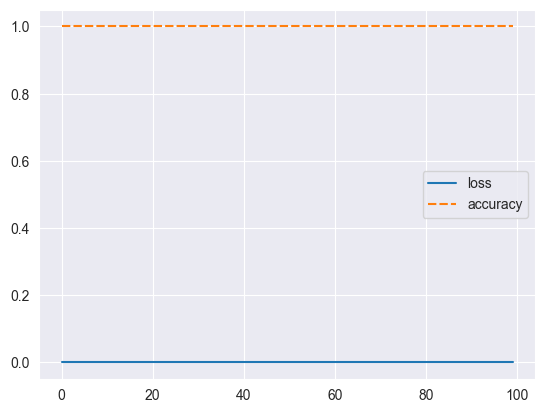

In [31]:
import seaborn as sns
sns.lineplot(data=metrics[['loss', 'accuracy']])